In [1]:
import nltk
import string
import re
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
from collections import Counter
import spacy
import requests
import io
import csv
import matplotlib.pyplot as plt

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

In [ ]:
def importdata(url):
    response = requests.get(url)
    response.raise_for_status()
    raw_text = response.text

    # Parse CSV 
    reader = csv.reader(io.StringIO(raw_text), delimiter=',', quotechar='"', skipinitialspace=True)
    rows = list(reader)
    max_cols = max(len(r) for r in rows)
    for r in rows:
        while len(r) < max_cols:
            r.append(None)
    df = pd.DataFrame(rows[1:], columns=rows[0])

    print(f"Loaded DataFrame: {len(df)} rows × {len(df.columns)} columns")
    return df

def clean_text(text):
    # Skip non-text values
    if not isinstance(text, str):
        return ""

    # Text formatting
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize, remove stopwords, stem + lemmatize
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return " ".join(tokens)

# Categorize jobs into umbrella titles for easier processing & reading
def categorize_title(title):
    title = str(title).lower()

    if re.search(r'\bscientist(s)?\b', title):
        return 'Data Scientist'
    elif re.search(r'\banalyst(s)?\b', title):
        return 'Data Analyst'
    elif re.search(r'\bengineer(s)?\b', title):
        return 'Data Engineer'
    elif re.search(r'\bengineer(s)?\b', title):
        return 'Data Engineer'
    elif re.search(r'\bcloud(s)?\b', title):
        return 'Cloud Computing'
    elif re.search(r'\bintern(ship|ships)?\b', title):
        return 'Data Science Intern'
    elif re.search(r'\bspecialist(s)?\b', title):
        return 'Data Specialist'
    elif re.search(r'\bmachine learning\b', title) or re.search(r'\bml\b', title):
        return 'Machine Learning Engineer'
    elif re.search(r'\bmanager\b', title):
        return 'Data Manager'
    else:
        return 'Other Data Science Role'



In [ ]:
# Data loading and pre-processing
url = "https://raw.githubusercontent.com/MaharLeika18/Data-Mining---Python/refs/heads/Loue/Midterms_Act1/MidtermsExam/Jobs.csv"
df = importdata(url)

df["categorized_title"] = df["title"].apply(categorize_title)
df["description"] = df["description"].apply(clean_text)

Loaded DataFrame: 790 rows × 5 columns


In [ ]:
# Inspect columns and titles
print(df.columns)
print(df[["title", "categorized_title"]].head(20))

Index(['', 'title', 'company', 'announcement', 'description',
       'categorized_title'],
      dtype='object')
                                                title        categorized_title
0          Senior Analyst, Data Science and Analytics             Data Analyst
1                               Senior Data Scientist           Data Scientist
2                           Lead Data Science Analyst             Data Analyst
3                                 Data Science Intern      Data Science Intern
4                                      Data Scientist           Data Scientist
5           Senior Solutions Architect (Data Science)  Other Data Science Role
6                               Senior Data Scientist           Data Scientist
7   Data Scientist - Research, Development & Const...           Data Scientist
8                 Data Science Manager - S&A Strategy             Data Manager
9                     Senior/Principal Data Scientist           Data Scientist
10                

In [14]:
# Export dataframe as csv
df.to_csv('ProcessedJobs.csv')

                  Category  Count
0             Data Analyst    388
1           Data Scientist    286
2  Other Data Science Role     44
3          Data Specialist     25
4      Data Science Intern     19
5             Data Manager     16
6            Data Engineer     12


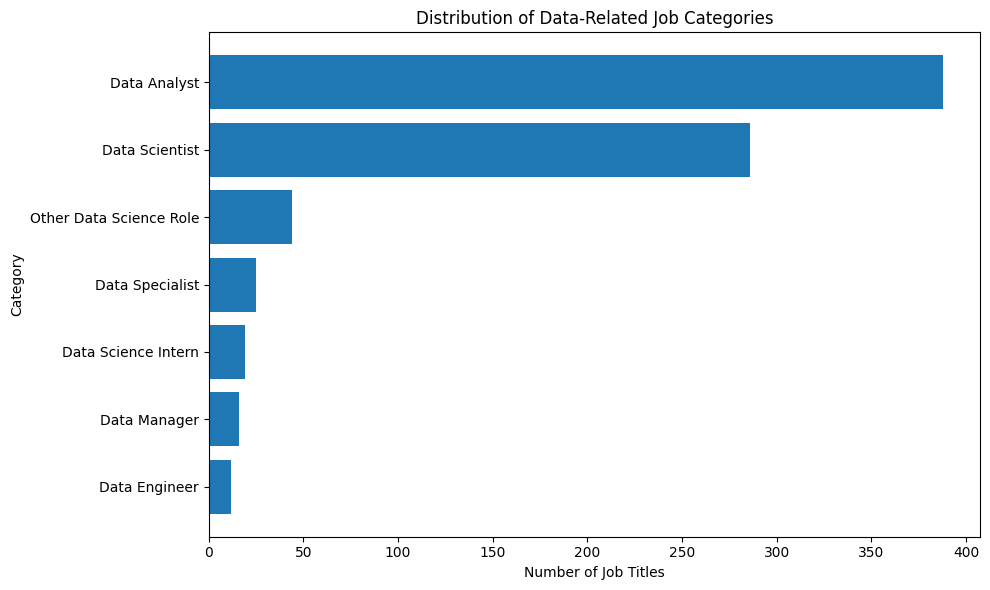

In [ ]:
# EDA Visualizations

# Distribution of Job Titles by Category
summary = df["categorized_title"].value_counts().reset_index()
summary.columns = ["Category", "Count"]
print(summary)

plt.figure(figsize=(10,6))
plt.barh(summary["Category"], summary["Count"])
plt.xlabel("Number of Job Titles")
plt.ylabel("Category")
plt.title("Distribution of Data-Related Job Categories")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


                  Category  Count
2  Other Data Science Role     44
3          Data Specialist     25
4      Data Science Intern     19
5             Data Manager     16
6            Data Engineer     12


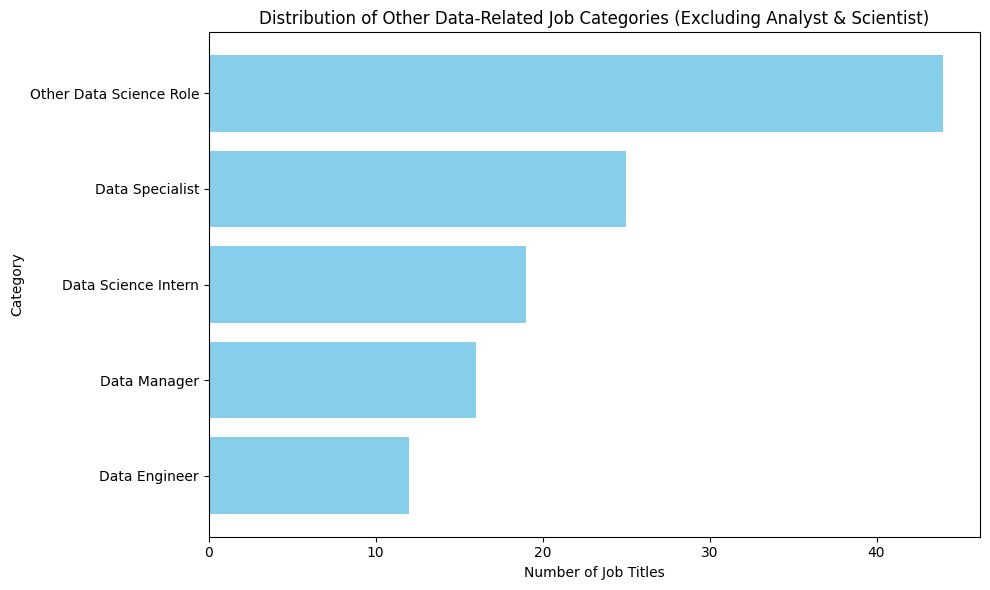

In [ ]:

# Distribution of Non-dominant Job Titles by Category
filtered_summary = summary[~summary["Category"].isin(["Data Scientist", "Data Analyst"])]
print(filtered_summary)

plt.figure(figsize=(10,6))
plt.barh(filtered_summary["Category"], filtered_summary["Count"], color='skyblue')
plt.xlabel("Number of Job Titles")
plt.ylabel("Category")
plt.title("Distribution of Other Data-Related Job Categories (Excluding Analyst & Scientist)")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


       Platform  Count
0      LinkedIn    189
1   SimplyHired     79
2  ZipRecruiter     66
3    Salary.com     41
4  Startup Jobs     20
5        Adzuna     20
6     Glassdoor     20
7    Greenhouse     14
8        Upwork     13
9      Built In     13


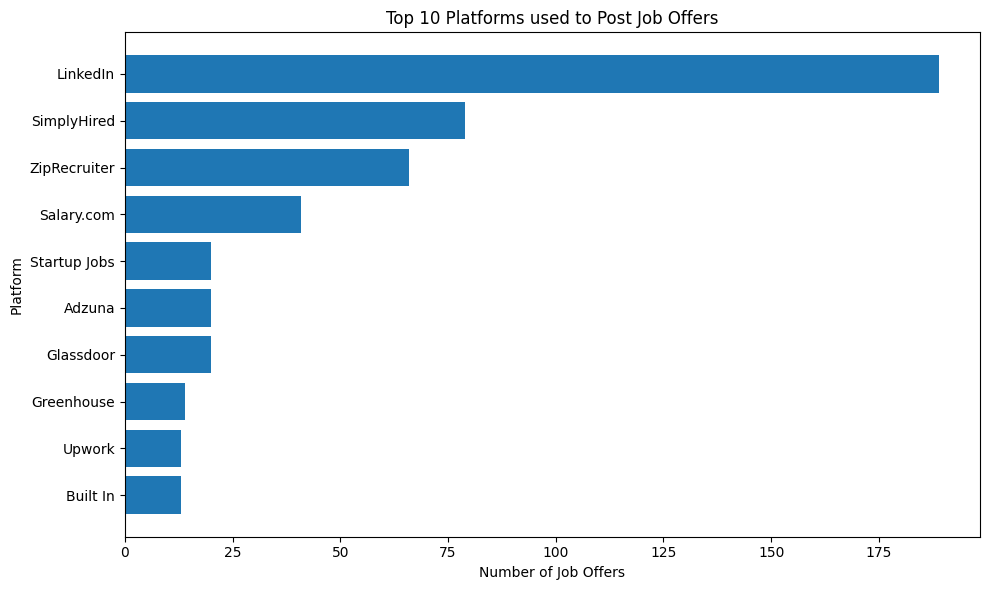

In [12]:
# Distribution of platforms used to post job offers
platforms = df["announcement"].value_counts().reset_index().head(10)
platforms.columns = ["Platform", "Count"]
print(platforms)

plt.figure(figsize=(10,6))
plt.barh(platforms["Platform"], platforms["Count"])
plt.xlabel("Number of Job Offers")
plt.ylabel("Platform")
plt.title("Top 10 Platforms used to Post Job Offers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


                            Company  Count
0                            Upwork     13
1                           Walmart     12
2                              Dice     10
3               Booz Allen Hamilton     10
4                   Cardinal Health      6
5                     SynergisticIT      5
6          Intermountain Healthcare      4
7  Staffigo Technical Services, LLC      4
8                          Staffigo      4
9                        Guidehouse      4


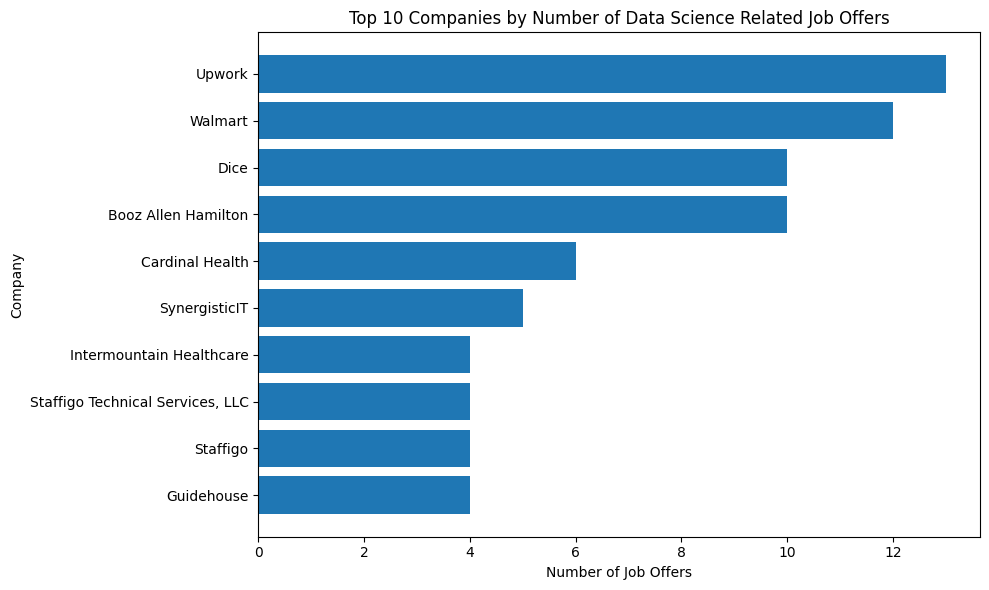

In [13]:
# Top Companies with most number of Data Science Related Job Offers
companies = df["company"].value_counts().reset_index().head(10)
companies.columns = ["Company", "Count"]
print(companies)

plt.figure(figsize=(10,6))
plt.barh(companies["Company"], companies["Count"])
plt.xlabel("Number of Job Offers")
plt.ylabel("Company")
plt.title("Top 10 Companies by Number of Data Science Related Job Offers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
